## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [2]:
data = pd.read_csv("../data/Telecom-Churn.csv")

In [3]:
print(data.shape)
data.columns

(7043, 22)


Index(['Unnamed: 0', 'CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [4]:
data.drop(columns=["Unnamed: 0", "CustomerID"], inplace=True)

In [5]:
data.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [6]:
data.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7017.000000,7032.000000
mean,0.162147,32.371149,64.707482,2283.300441
std,0.368612,24.559481,30.105503,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,401.450000
50%,0.000000,29.000000,70.300000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


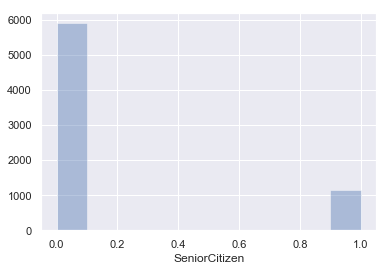

In [7]:
g = sns.distplot(data["SeniorCitizen"], kde=False, bins=10)

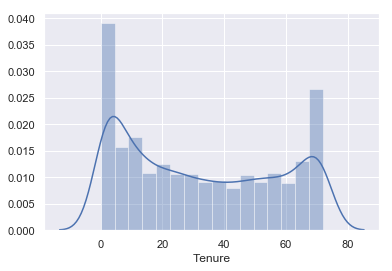

In [8]:
g = sns.distplot(data["Tenure"])

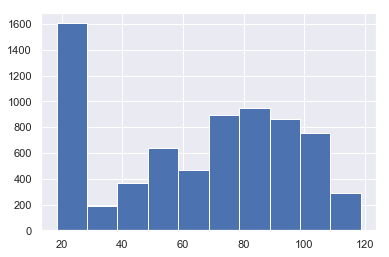

In [9]:
g = data["MonthlyCharges"].hist()

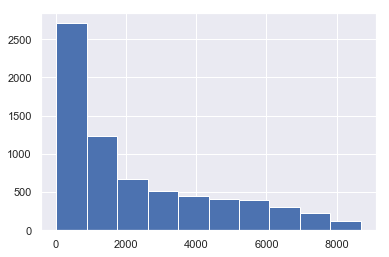

In [10]:
g = data["TotalCharges"].hist()

Male      3555
Female    3488
Name: Gender, dtype: int64


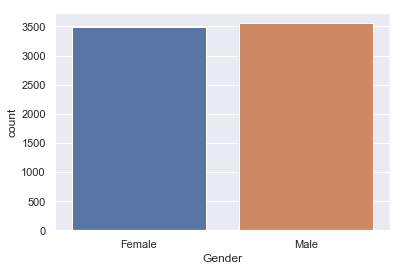

In [11]:
print(data["Gender"].value_counts())
g = sns.countplot(x='Gender', data=data)

No     3641
Yes    3402
Name: Partner, dtype: int64


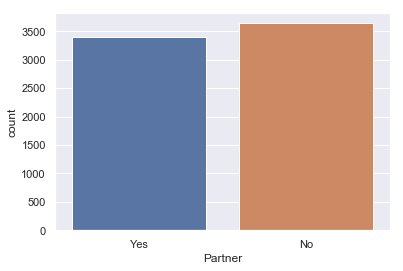

In [12]:
print(data["Partner"].value_counts())
g = sns.countplot(x='Partner', data=data)

No     4921
Yes    2102
Name: Dependents, dtype: int64


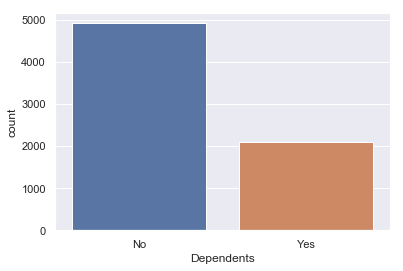

In [13]:
print(data["Dependents"].value_counts())
g = sns.countplot(x='Dependents', data=data)

Yes    6361
No      682
Name: PhoneService, dtype: int64


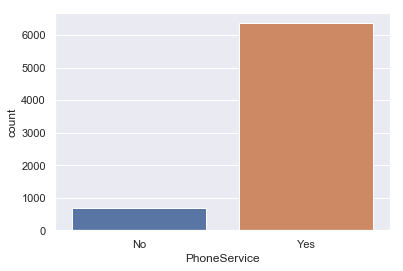

In [14]:
print(data["PhoneService"].value_counts())
g = sns.countplot(x='PhoneService', data=data)

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


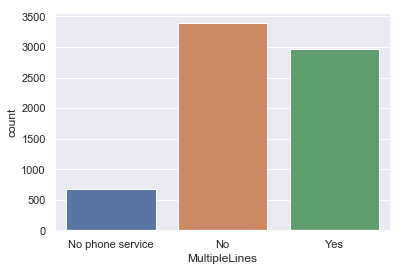

In [15]:
print(data["MultipleLines"].value_counts())
g = sns.countplot(x='MultipleLines', data=data)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


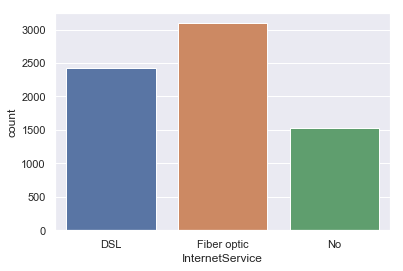

In [16]:
print(data["InternetService"].value_counts())
g = sns.countplot(x='InternetService', data=data)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


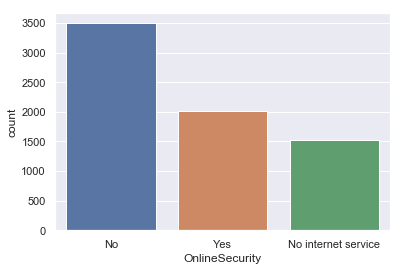

In [17]:
print(data["OnlineSecurity"].value_counts())
g = sns.countplot(x='OnlineSecurity', data=data)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


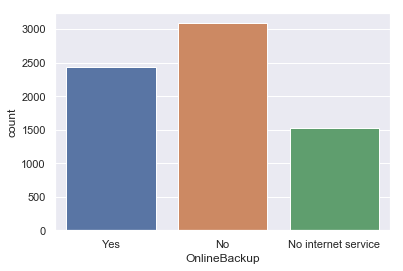

In [18]:
print(data["OnlineBackup"].value_counts())
g = sns.countplot(x='OnlineBackup', data=data)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


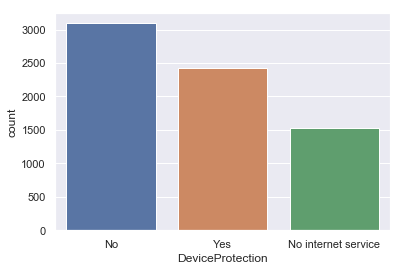

In [19]:
print(data["DeviceProtection"].value_counts())
g = sns.countplot(x='DeviceProtection', data=data)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


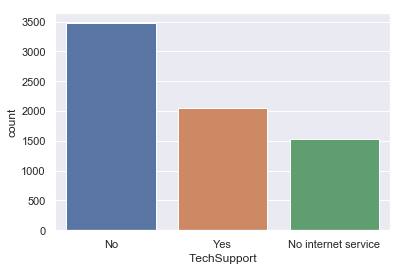

In [20]:
print(data["TechSupport"].value_counts())
g = sns.countplot(x='TechSupport', data=data)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


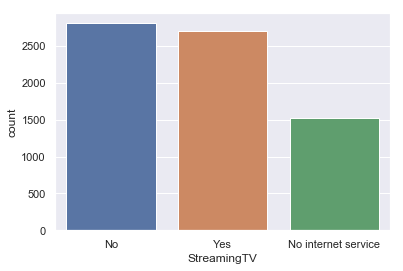

In [21]:
print(data["StreamingTV"].value_counts())
g = sns.countplot(x='StreamingTV', data=data)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


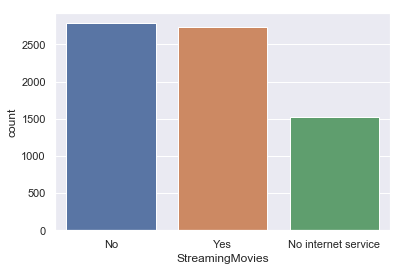

In [22]:
print(data["StreamingMovies"].value_counts())
g = sns.countplot(x='StreamingMovies', data=data)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


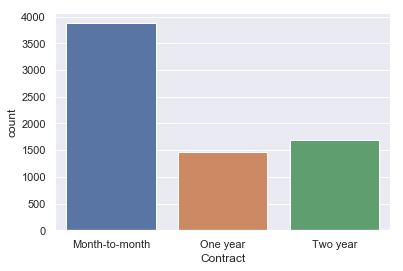

In [23]:
print(data["Contract"].value_counts())
g = sns.countplot(x='Contract', data=data)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


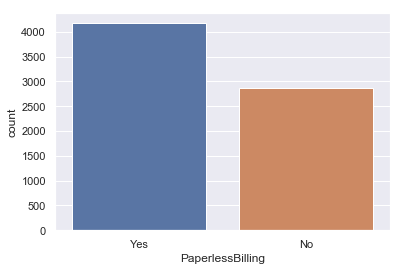

In [24]:
print(data["PaperlessBilling"].value_counts())
g = sns.countplot(x='PaperlessBilling', data=data)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


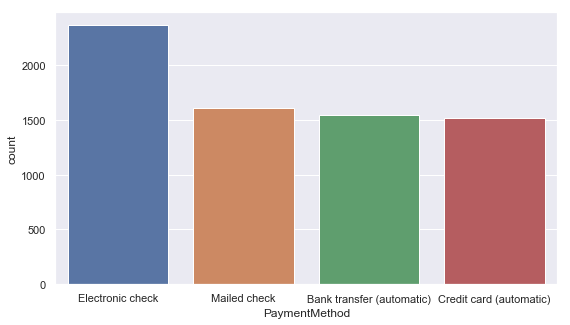

In [25]:
print(data["PaymentMethod"].value_counts())
plt.figure(figsize=(9,5))
sns.countplot(x='PaymentMethod', data=data)
plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64


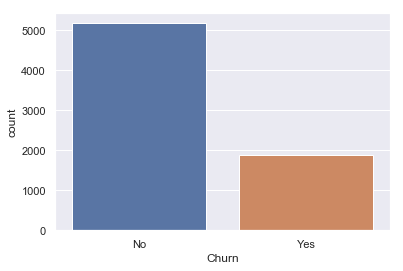

In [26]:
print(data["Churn"].value_counts())
g = sns.countplot(x="Churn", data=data)

In [27]:
data.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

                SeniorCitizen    Tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.219811      0.102411
Tenure               0.016567  1.000000        0.247732      0.825880
MonthlyCharges       0.219811  0.247732        1.000000      0.651316
TotalCharges         0.102411  0.825880        0.651316      1.000000


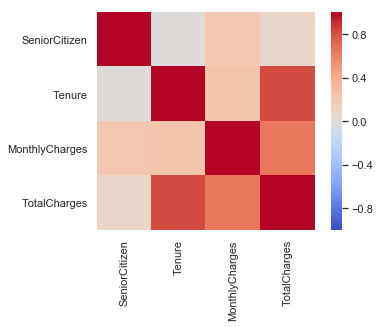

In [28]:
factors = data[["SeniorCitizen", "Tenure", "MonthlyCharges","TotalCharges"]]
corr_table = factors.corr()
print(corr_table)
p = sns.heatmap(corr_table,
                xticklabels=corr_table.columns, yticklabels=corr_table.columns,
                vmin=-1, vmax=1,
                cmap='coolwarm',
                square=True)

Najviac korelované sú atribúty Tenure a TotalCharges.

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [29]:
data["MonthlyCharges_ordinal"] = pd.cut(data["MonthlyCharges"], 5)
data["MonthlyCharges_ordinal"].value_counts()

(78.55, 98.65]     1817
(18.15, 38.35]     1797
(58.45, 78.55]     1361
(98.65, 118.75]    1042
(38.35, 58.45]     1000
Name: MonthlyCharges_ordinal, dtype: int64

In [30]:
data["TotalCharges_ordinal"] = pd.cut(data["TotalCharges"], 5)
data["TotalCharges_ordinal"].value_counts()

(10.134, 1752.0]    3937
(1752.0, 3485.2]    1179
(3485.2, 5218.4]     866
(5218.4, 6951.6]     705
(6951.6, 8684.8]     345
Name: TotalCharges_ordinal, dtype: int64

In [31]:
data["Tenure_ordinal"] = pd.qcut(data["Tenure"], 5)
data["Tenure_ordinal"].value_counts()

(-0.001, 6.0]    1481
(20.0, 40.0]     1408
(60.0, 72.0]     1407
(6.0, 20.0]      1397
(40.0, 60.0]     1350
Name: Tenure_ordinal, dtype: int64

In [32]:
data.drop(columns=["MonthlyCharges_ordinal", "TotalCharges_ordinal", "Tenure_ordinal"], inplace=True)

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [33]:
pd.pivot_table(data,index="Churn", columns=["Tenure"], values="MonthlyCharges")

Tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
No,41.418182,37.751940,47.764912,50.924528,45.649462,51.481884,45.448571,49.740,47.635802,57.685616,...,72.195588,75.851333,78.364179,71.724000,68.616667,70.879670,68.190805,74.212963,72.876074,80.321328
Yes,NaN,58.168338,66.099180,66.010638,70.635542,71.269531,76.085000,75.093,75.153659,70.307609,...,102.837500,80.937500,95.961111,98.823077,101.370000,98.005556,99.450000,97.645455,95.133333,96.875000


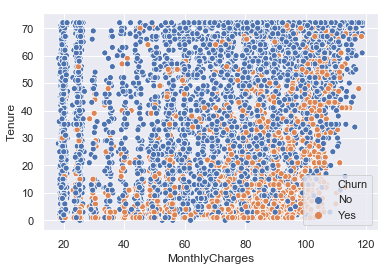

In [34]:
g = sns.scatterplot(x='MonthlyCharges', y='Tenure', hue='Churn', data=data)

Z vizualizácie vyplýva, že zákazníci častejšie odchádzali, ak boli krátko zákazníkmi spoločnosti a výška platby - MonthlyCharges bola cca nad 80.

In [35]:
pd.pivot_table(data,index="Churn", columns="Tenure", values="TotalCharges")

Tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
No,37.909013,95.997391,152.135849,182.525806,256.001449,271.215,351.261250,387.63642,516.340411,457.685915,...,4539.350735,4838.829605,5087.634328,4763.973684,4620.641477,4836.758791,4691.04023,5200.868981,5182.708537,5791.770225
Yes,58.197368,131.474797,200.123404,284.319277,356.769531,449.855,523.692157,607.72619,639.998913,808.390000,...,6457.275000,5196.450000,6201.716667,6582.107692,6773.165000,6720.550000,6887.93125,6803.995455,6765.908333,7039.150000


Z pivot_table vyplýva, že zákazníci odchádzali, ak platili vyššie celkové poplatky (TotalCharges).

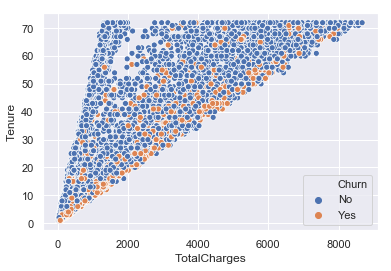

In [37]:
g = sns.scatterplot(x='TotalCharges', y='Tenure', hue='Churn', data=data)

In [38]:
pd.pivot_table(data,index="Churn", columns="Gender", values="SeniorCitizen", aggfunc="mean")

Gender,Female,Male
Churn,,
No,0.128678,0.128762
Yes,0.255591,0.253763


Pohlavie nemá vplyv na odchod zo spoločnosti.

In [39]:
pd.crosstab(index=[data["PhoneService"], data["InternetService"]], columns=[data["StreamingMovies"], data["StreamingTV"]])

StreamingMovies                No      No internet service  Yes      
StreamingTV                    No  Yes No internet service   No   Yes
PhoneService InternetService                                         
No           DSL              299   85                   0   98   200
Yes          DSL              814  242                   0  253   430
             Fiber optic      905  440                   0  441  1310
             No                 0    0                1526    0     0

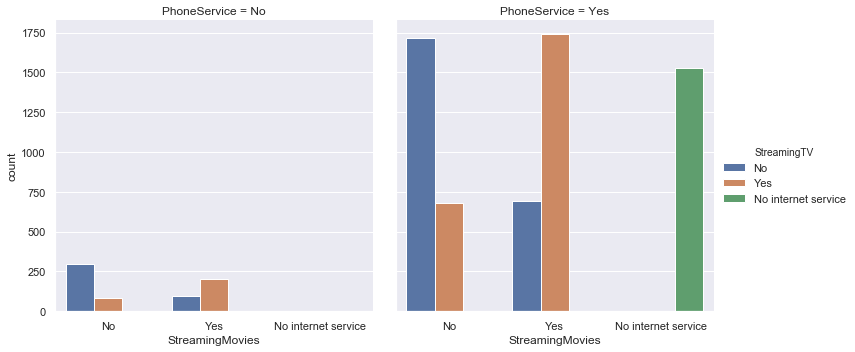

In [40]:
g = sns.catplot(x="StreamingMovies", hue="StreamingTV", col="PhoneService", data=data, kind="count")

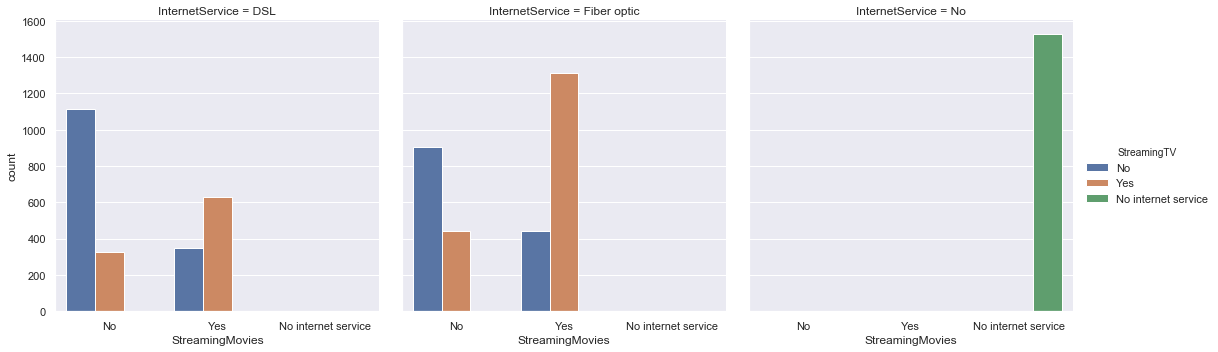

In [41]:
g = sns.catplot(x="StreamingMovies", hue="StreamingTV", col="InternetService", data=data, kind="count")

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [42]:
data["MonthlyCharges"].isna().sum()

26

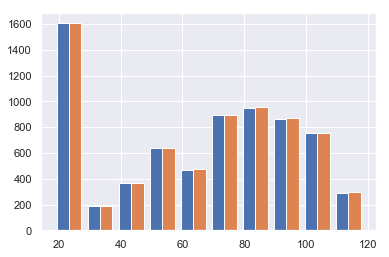

In [43]:
monthlycharges1 = data["MonthlyCharges"].dropna()

def replace_missing_monthlycharges(row):
    totalcharges = row["TotalCharges"]
    tenure = row["Tenure"]
    monthlycharges = row["MonthlyCharges"]
    if pd.isna(monthlycharges):
        return totalcharges / tenure
    else:
        return monthlycharges
    
monthlycharges2 = data.apply(replace_missing_monthlycharges, axis=1)

p = plt.hist([monthlycharges1, monthlycharges2])

In [44]:
data["MonthlyCharges"] = monthlycharges2
data["MonthlyCharges"].isna().sum()

0

In [45]:
data["TotalCharges"].isna().sum()

11

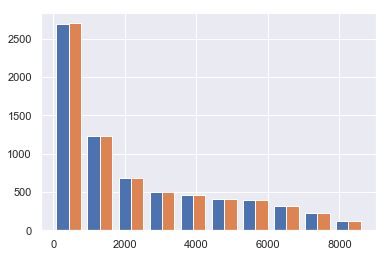

In [46]:
totalcharges1 = data["TotalCharges"].dropna()

def replace_missing_totalcharges(row):
    totalcharges = row["TotalCharges"]
    tenure = row["Tenure"]
    monthlycharges = row["MonthlyCharges"]
    if pd.isna(totalcharges):
        return monthlycharges * tenure
    else:
        return totalcharges
    
totalcharges2 = data.apply(replace_missing_totalcharges, axis=1)

p = plt.hist([totalcharges1, totalcharges2])

In [47]:
data["TotalCharges"] = totalcharges2
data["TotalCharges"].isna().sum()

0

In [48]:
data["Dependents"].isna().sum()

20

In [49]:
pd.crosstab(index=[data["Gender"], data["Partner"]], columns=data["Dependents"])

Dependents        No  Yes
Gender Partner           
Female No       1646  144
       Yes       804  880
Male   No       1624  214
       Yes       847  864

In [50]:
def replace_missing_dependents(row):
    dependents = row["Dependents"]
    gender = row["Gender"]
    partner = row["Partner"]
    if pd.isna(dependents):
        if partner == "No":
            return "No"
        else:
            if gender == "Female":
                return "Yes"
            else:
                return "No"
    else:
        return dependents

data["Dependents"] = data.apply(replace_missing_dependents, axis=1)
data["Dependents"].isna().sum()

0

In [51]:
data.isna().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [52]:
data["TotalMonthCharges"] = data.eval("MonthlyCharges * Tenure")

In [53]:
def fill_totalratio(row):
    totalmonthcharges = row["TotalMonthCharges"]
    totalcharges = row["TotalCharges"]
    if totalmonthcharges < totalcharges:
        return -1
    elif totalmonthcharges > totalcharges:
        return 1
    else:
        return 0

data["TotalRatio"] = data.apply(fill_totalratio, axis=1)
data.head(3)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalMonthCharges,TotalRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70,-1


### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [54]:
data.drop(columns=["TotalMonthCharges", "PhoneService"], inplace=True)

Odstránila som parameter TotalMonthCharges, pretože som ho potrebovala na vytvorenie atribútu TotalRatio, ktorý odráža vzťah medzi TotalMonthCharges a TotalCharges. Taktiež chcem odstrániť atribút PhoneService, pretože z countplotu vykresleného v druhom cvičení vyplýva, že PhoneService má väčšina zákazníkov.

In [55]:
data.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'TotalRatio'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder

data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])
data['Dependents'] = LabelEncoder().fit_transform(data['Dependents'])
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])

In [57]:
data = pd.get_dummies(data, columns=['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'])

In [58]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalRatio,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,1,29.85,29.85,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,0,56.95,1889.50,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,53.85,108.15,1,-1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,42.30,1840.75,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,70.70,151.65,1,-1,...,1,0,0,1,0,0,0,0,1,0


### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [59]:
X_data = data.drop('Churn', axis=1) 
y_data = data['Churn']

print(X_data.shape)
print(y_data.shape)

(7043, 40)
(7043,)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)

In [61]:
from sklearn.preprocessing import MinMaxScaler
#Keďže sa normalizácia nevyžaduje pre všetky typy klasifikačných modelov, vytvorila som si trénovaciu a testovaciu množinu,
# aj na normalizovaných dátach.

scaler = MinMaxScaler() 
normdata = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

X_normdata = normdata.drop('Churn', axis=1) 
y_normdata = normdata['Churn']

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normdata, y_normdata, test_size=0.3, random_state=1)

C:\Users\Marry\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model_knn = KNeighborsClassifier(n_neighbors=19)
model_knn.fit(X_train_norm, y_train_norm)
y_model_knn = model_knn.predict(X_test_norm)
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test_norm, y_model_knn)}")

Presnosť (accuracy) modelu: 0.7851396119261713


In [63]:
#Hľadanie optimálnych parametrov modelu kNN pomocou GridSearch.
k_range = list(range(1, 50))
weights_range = ['uniform','distance']  
metric_range = ['euclidean', 'manhattan'] 

param_grid = dict(n_neighbors=k_range, weights=weights_range, metric=metric_range)
grid_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_knn.fit(X_train_norm, y_train_norm)

print("Najlepšie kombinácia parametrov je:")
print()
print(grid_knn.best_params_)
print()
print(grid_knn.best_score_)

Najlepšie kombinácia parametrov je:

{'metric': 'manhattan', 'n_neighbors': 49, 'weights': 'uniform'}

0.786815415821501


In [64]:
#Natrénovanie modelu kNN podľa optimálnych parametrov.
model_knn = KNeighborsClassifier(n_neighbors=49, weights='uniform', metric='manhattan')
model_knn.fit(X_train_norm, y_train_norm)
y_model_knn = model_knn.predict(X_test_norm)

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3) #Natrenovala som si DecisionTree a skusala som mu menit max_depth a sledovala som kedy má najvyššiu accuracy.
dt.fit(X_train, y_train)    
y_dt = dt.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_dt)}")

Presnosť (accuracy) modelu: 0.7979176526265973


In [66]:
criterion_range = ["gini", "entropy"]
max_depth_range = [1,2,3,4,5,6,7,8,9,10]
min_samples_split_range = [2, 4, 8, 10]
min_samples_leaf_range = [1, 5, 10, 15]
presort_range = [True, False]

param_grid = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )

dtree = DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train,y_train)

print("Najlepšia kombinácia parametrov je:")
print(grid_dt.best_params_)
print()
print("A hodnota presnosti modelu pri tejto kombinacii je:")
print(grid_dt.best_score_)

Najlepšia kombinácia parametrov je:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'presort': True}

A hodnota presnosti modelu pri tejto kombinacii je:
0.7890466531440162


In [75]:
# Natrénujem nový model Decision Tree s najlepšou kombináciou parametrov.
dt = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=1, min_samples_split=2, presort=True) 
dt.fit(X_train, y_train)
y_model_dt = dt.predict(X_test)

In [76]:
from sklearn.naive_bayes import GaussianNB 

nb = GaussianNB()
nb.fit(X_train,y_train)
y_nb = nb.predict(X_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=7)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

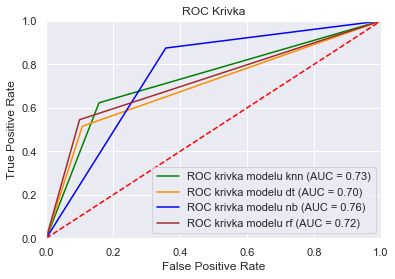

In [78]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test_norm, y_model_knn, pos_label=1) 
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_model_dt, pos_label=1) 
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_nb, pos_label=1) 
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_rf, pos_label=1)

roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2) 
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)

plt.title('ROC Krivka')

plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu knn (AUC = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='darkorange', label = 'ROC krivka modelu dt (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='blue', label = 'ROC krivka modelu nb (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='brown', label = 'ROC krivka modelu rf (AUC = %0.2f)' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--', color='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Podľa ROC krivky je najlepší Naive Bayes model.

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) kNN modelu: {accuracy_score(y_test_norm, y_model_knn)}")
print(f"Presnosť (precision) kNN modelu: {precision_score(y_test_norm, y_model_knn)}")
print(f"Návratnosť (recall) kNN modelu: {recall_score(y_test_norm, y_model_knn)}")

print(confusion_matrix(y_test_norm, y_model_knn))

Presnosť (accuracy) kNN modelu: 0.7875059157595835
Presnosť (precision) kNN modelu: 0.5682210708117443
Návratnosť (recall) kNN modelu: 0.6231060606060606
[[1335  250]
 [ 199  329]]


In [80]:
print(f"Presnosť (accuracy) decision tree modelu: {accuracy_score(y_test, y_model_dt)}")
print(f"Presnosť (precision) decision tree modelu: {precision_score(y_test, y_model_dt)}")
print(f"Návratnosť (recall) decision tree modelu: {recall_score(y_test, y_model_dt)}")
print(confusion_matrix(y_test, y_model_dt))

Presnosť (accuracy) decision tree modelu: 0.7979176526265973
Presnosť (precision) decision tree modelu: 0.6139954853273137
Návratnosť (recall) decision tree modelu: 0.5151515151515151
[[1414  171]
 [ 256  272]]


In [81]:
print(f"Presnosť (accuracy) naive bayes modelu: {accuracy_score(y_test, y_nb)}")
print(f"Presnosť (precision) naive bayes modelu: {precision_score(y_test, y_nb)}")
print(f"Návratnosť (recall) naive bayes modelu: {recall_score(y_test, y_nb)}")
print(confusion_matrix(y_test, y_nb))

Presnosť (accuracy) naive bayes modelu: 0.7008991954566967
Presnosť (precision) naive bayes modelu: 0.4494163424124514
Návratnosť (recall) naive bayes modelu: 0.875
[[1019  566]
 [  66  462]]


In [82]:
print(f"Presnosť (accuracy) random forest modelu: {accuracy_score(y_test, y_rf)}")
print(f"Presnosť (precision) random forest modelu: {precision_score(y_test, y_rf)}")
print(f"Návratnosť (recall) random forest modelu: {recall_score(y_test, y_rf)}")
print(confusion_matrix(y_test, y_rf))

Presnosť (accuracy) random forest modelu: 0.8116422148603881
Presnosť (precision) random forest modelu: 0.6457399103139013
Návratnosť (recall) random forest modelu: 0.5454545454545454
[[1427  158]
 [ 240  288]]


Podľa metrík najlepšie predikuje model Random Forest. 

In [84]:
from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_data.columns.values, class_names=['0','1'], out_file=f)

Z vykresleného modelu Decision Tree vyplýva, že rozhodujúcim kritériom pre odchod zákazníka bol Contract month-to-month. Zákazníci s týmto contractom odchádzali najčastejšie.